In [2]:
from Bio.Sequencing import Ace
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt 

assembly = Ace.read(open('F20-R-200000 Assembly Contig 1.ace'))

In [3]:
# Contig 7 ye kadar yap.
assembly.ncontigs

1

In [4]:
assembly.nreads

119732

In [5]:
contig = assembly.contigs[0]
contig.reads[0].rd.name

'M03777:31:000000000-ALHR2:1:1110:10953:16308_1:N:0:2'

In [6]:
depth = np.zeros(contig.nbases+1, dtype=int)

for i in range(contig.nreads):
    read_len = contig.reads[i].rd.padded_bases
    read_pos_start = contig.af[i].padded_start
    for j in range(read_pos_start, read_pos_start + read_len):
        depth[j] +=1
    
depth

array([0, 2, 2, ..., 1, 1, 1])

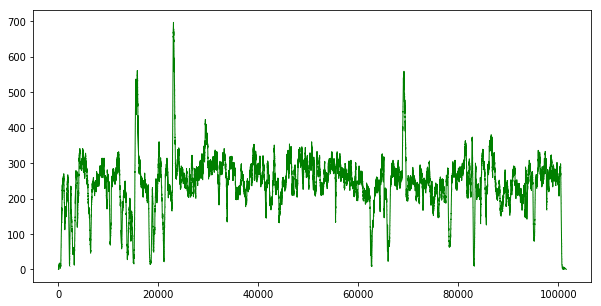

In [7]:
plt.figure(figsize=(10,5))
plt.plot(depth,color='green', marker='o', linestyle='-',linewidth=1, markersize=0.01)
plt.show()

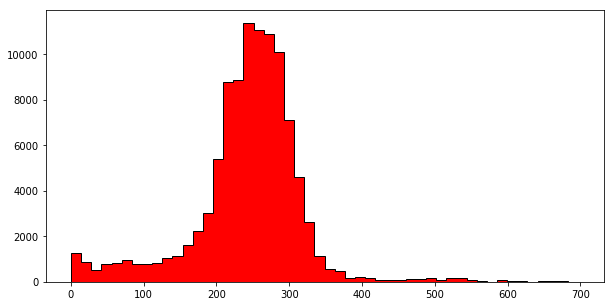

In [9]:
plt.figure(figsize=(10,5))
plt.hist(depth, histtype="stepfilled", bins=50, color="r", cumulative=False, edgecolor="black")
plt.show()

In [10]:
# bad_places = (depth < (depth.mean()-3*depth.std())) | (depth>= (depth.mean()+3*depth.std()))
bad_places = (depth < 100) | (depth>= 350)


In [11]:
all_reads = [(contig.af[i].name,
          contig.af[i].padded_start,
          contig.reads[i].rd.padded_bases) for i in range(contig.nreads)]

In [12]:
len(all_reads)

119732

In [13]:
bad_reads = set()

for name, start, length in all_reads:
    bad_bp_in_read = np.sum(bad_places[start:(start+length)])
    if bad_bp_in_read > length/5:
        bad_reads.add(name)

len(bad_reads)

10418

In [14]:
good_reads = [x[0] for x in all_reads if x[0] not in bad_reads]
len(good_reads)

109314

In [16]:
good_reads_sub = []

for i in range(len(good_reads)):
        good_reads_sub.append(good_reads[i][28:44])

good_reads_sub

['1107:24668:17126',
 '2112:19772:16160',
 '2102:15126:3691_',
 '1102:19848:14906',
 '2102:10549:12033',
 '1114:20806:12826',
 '2108:17771:4751_',
 '1110:4191:18055_',
 '1113:12378:11825',
 '1104:24114:23337',
 '1104:24114:23337',
 '1101:7987:25245_',
 '2109:22616:11881',
 '2109:22616:11881',
 '2112:7248:19324_',
 '1110:28300:21213',
 '1110:28300:21213',
 '1114:15346:18415',
 '1114:15346:18415',
 '1112:24438:14445',
 '2109:8857:6565_2',
 '2110:13551:23226',
 '1106:10614:26852',
 '1111:11401:9677_',
 '2106:27145:14498',
 '2107:19689:8906_',
 '2106:2523:12756_',
 '2107:19689:8906_',
 '1109:18420:7822_',
 '2105:26798:12791',
 '2103:19467:21509',
 '2111:2104:17370_',
 '1101:7987:25245_',
 '1110:22244:25816',
 '2110:16689:3126_',
 '2110:16689:3126_',
 '1113:21311:19650',
 '2101:7913:11026_',
 '2101:7913:11026_',
 '1113:17427:4973_',
 '2103:7550:25042_',
 '1110:14313:2114_',
 '2106:11220:12583',
 '1101:17601:28273',
 '2106:9283:22622_',
 '2112:18207:22766',
 '2112:7248:19324_',
 '2113:19272:

In [17]:
good_reads_sub_count = [[x,good_reads_sub.count(x)] for x in set(good_reads_sub)]
good_reads_sub_count

[['2114:4848:16992_', 2],
 ['1105:18392:3216_', 2],
 ['2108:14989:8208_', 2],
 ['1101:12307:24942', 2],
 ['2109:14998:26147', 2],
 ['2106:24817:8506_', 2],
 ['2102:17337:21388', 2],
 ['1109:16415:22436', 2],
 ['2109:12691:17663', 2],
 ['1101:3743:18289_', 2],
 ['2103:19620:20373', 2],
 ['1106:5077:7495_1', 1],
 ['2111:13558:16092', 2],
 ['1101:7191:16777_', 2],
 ['2105:22959:6677_', 2],
 ['1108:14876:25325', 2],
 ['2114:22313:26685', 2],
 ['1105:18970:16256', 2],
 ['1114:27538:21804', 2],
 ['1104:10947:17415', 2],
 ['2111:7732:10484_', 1],
 ['2109:15231:13471', 2],
 ['1114:15116:2191_', 2],
 ['1112:6764:13634_', 1],
 ['2108:19049:4468_', 2],
 ['2110:20230:11722', 2],
 ['1102:4500:12422_', 1],
 ['2101:18341:21006', 2],
 ['2111:9136:21572_', 2],
 ['2107:4778:6741_1', 1],
 ['2113:4675:14380_', 2],
 ['1112:13746:20574', 2],
 ['2112:13912:20073', 2],
 ['2112:18743:20684', 2],
 ['1107:13711:10080', 2],
 ['2107:28257:17720', 1],
 ['2112:9449:4715_2', 1],
 ['1105:14854:2367_', 2],
 ['2114:1072

In [18]:
not_paired_reads_sub = []

for i in range(len(good_reads_sub_count)):
    if good_reads_sub_count[i][1]==1:
        not_paired_reads_sub.append(good_reads_sub_count[i][0])

not_paired_reads_sub

['1106:5077:7495_1',
 '2111:7732:10484_',
 '1112:6764:13634_',
 '1102:4500:12422_',
 '2107:4778:6741_1',
 '2107:28257:17720',
 '2112:9449:4715_2',
 '2113:3244:9756_2',
 '2103:8349:6556_2',
 '2112:6314:6211_1',
 '2102:9816:7958_1',
 '2104:4828:6717_2',
 '1112:5797:7857_1',
 '1112:18920:24395',
 '2107:7201:5793_2',
 '1111:9708:9351_1',
 '1110:7833:4655_1',
 '2103:12674:6487_',
 '1112:8268:5133_1',
 '2113:3994:8750_2',
 '1103:5672:7103_1',
 '1103:3989:9246_1',
 '1111:4701:8543_2',
 '2113:6300:9801_2',
 '1110:9059:4320_1',
 '2102:4503:9154_1',
 '1107:5967:7735_1',
 '2110:14353:27341',
 '2107:7656:7813_2',
 '1107:18592:1635_',
 '1107:5666:9475_1',
 '1109:6884:6989_1',
 '1112:10734:15748',
 '2114:6718:9973_1',
 '2111:12953:14897',
 '1106:6711:7248_2',
 '2114:6306:7676_1',
 '2114:6649:8841_2',
 '2111:8382:6727_2',
 '2108:9300:3168_1',
 '2114:9111:8068_2',
 '1106:28349:11410',
 '2106:6490:7803_1',
 '1113:27277:12147',
 '1106:5778:8395_1',
 '2106:7650:8882_2',
 '1114:15449:25501',
 '1114:11765:

In [19]:
len(not_paired_reads_sub)

8806

In [20]:
len(good_reads)-len(not_paired_reads_sub)

100508

In [21]:
paired_good_reads = []

for i in range(len(good_reads)):
    if good_reads[i][28:44]  not in not_paired_reads_sub:
        paired_good_reads.append(good_reads[i])

paired_good_reads.sort()
paired_good_reads

['M03777:31:000000000-ALHR2:1:1101:10003:9774_1:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10003:9774_2:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10018:2727_1:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10018:2727_2:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10048:4390_1:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10048:4390_2:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10079:26810_1:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10079:26810_2:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10096:8282_1:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10096:8282_2:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10101:9622_1:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10101:9622_2:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10124:5281_1:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10124:5281_2:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10134:16077_1:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10134:16077_2:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10140:13093_1:N:0:2',
 'M03777:31:000000000-ALHR2:1:1101:10140:13

In [22]:
len(paired_good_reads)

100508